In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
from math import sqrt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
 raw_csv_data = pd.read_csv('./input/013 IndexE8.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df,df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
# DF: degree of freedom
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf # extracts Log-Lielihood
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1)) # compute test statistics
    p = chi2.sf(LR, DF).round(3) # calculate p-value
    return p

### Creating Returns

In [6]:
df['returns'] = df.market_value.pct_change(1)*100

### ARMA(1,1)

In [7]:
model_ret_ar_1_ma_1 = ARMA(df.returns[1:], order=(1,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Tue, 12 May 2020   AIC                          15841.000
Time:                        08:27:26   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.returns     0.7649      0.067     11.349      0.000       0.633       0.897
ma.L1.returns    -0.8141      0.061    -13.406      0.000      -0.933      -0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3074           +0.0000j            1.3074            0.0000
MA.1            1.2284           +0.0000j            1.2284            0.0000
-----------------------------------------------------------------------------
"""

In [8]:
model_ret_ar_1 = ARMA(df.returns[1:], order=(1,0))
model_ret_ma_1 = ARMA(df.returns[1:], order=(0,1))

In [9]:
print(f"\nARMA vs AR = {LLR_test(model_ret_ar_1,model_ret_ar_1_ma_1)}")
print(f"\nARMA vs MA = {LLR_test(model_ret_ma_1,model_ret_ar_1_ma_1)}")


ARMA vs AR = 0.0

ARMA vs MA = 0.0


<b>We can see by LLR score that ARMA is better then AR / MA</b>

### High-Lag ARMA Models

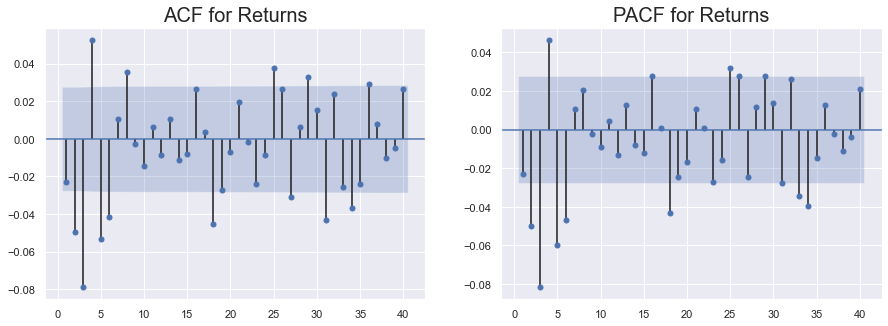

In [60]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

sm.graphics.tsa.plot_acf(df.returns[1:], lags = 40, zero = False, ax=ax[0])
ax[0].set_title("ACF for Returns",size=20)

sm.graphics.tsa.plot_pacf(df.returns[1:], lags = 40, zero = False, ax=ax[1])
ax[1].set_title("PACF for Returns",size=20)

plt.show()

In [63]:
model_ret_ar_3_ma_3 = ARMA(df.returns[1:], order=(3,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()
print(results_ret_ar_3_ma_3.summary())
print(f"\nLLR test p-value = {LLR_test(model_ret_ar_1_ma_1,model_ret_ar_3_ma_3, DF=4)}")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 3)   Log Likelihood               -7893.515
Method:                       css-mle   S.D. of innovations              1.166
Date:                Tue, 12 May 2020   AIC                          15803.030
Time:                        09:15:05   BIC                          15855.199
Sample:                    01-10-1994   HQIC                         15821.310
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.395      0.163      -0.008       0.045
ar.L1.returns    -0.1898      0.104     -1.827      0.068      -0.393       0.014
ar.L2.returns    -0.2942      0.087     

<b>First lag ma  isnt sagnificantly different from zero As well as the first AR so lower lag model might be better</b>

In [64]:
model_ret_ar_3_ma_2 = ARMA(df.returns[1:], order=(3,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
print(results_ret_ar_3_ma_2.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 2)   Log Likelihood               -7895.747
Method:                       css-mle   S.D. of innovations              1.166
Date:                Tue, 12 May 2020   AIC                          15805.495
Time:                        09:19:25   BIC                          15851.143
Sample:                    01-10-1994   HQIC                         15821.491
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.251      0.211      -0.011       0.048
ar.L1.returns    -0.6785      0.087     -7.799      0.000      -0.849      -0.508
ar.L2.returns    -0.5088      0.139     

<b>The coef values decrease it suggests that thr further back in time we go, the less relevant values and errors become</b>

In [65]:
model_ret_ar_2_ma_3 = ARMA(df.returns[1:], order=(2,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
print(results_ret_ar_2_ma_3.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 3)   Log Likelihood               -7895.587
Method:                       css-mle   S.D. of innovations              1.166
Date:                Tue, 12 May 2020   AIC                          15805.174
Time:                        09:23:32   BIC                          15850.823
Sample:                    01-10-1994   HQIC                         15821.170
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.276      0.202      -0.010       0.048
ar.L1.returns    -0.5605      0.090     -6.245      0.000      -0.736      -0.385
ar.L2.returns    -0.4187      0.193     

In [69]:
model_ret_ar_3_ma_1 = ARMA(df.returns[1:], order=(3,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
print(results_ret_ar_3_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 1)   Log Likelihood               -7899.072
Method:                       css-mle   S.D. of innovations              1.167
Date:                Tue, 12 May 2020   AIC                          15810.144
Time:                        09:28:16   BIC                          15849.271
Sample:                    01-10-1994   HQIC                         15823.855
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.298      0.194      -0.010       0.047
ar.L1.returns    -0.5077      0.088     -5.769      0.000      -0.680      -0.335
ar.L2.returns    -0.0638      0.016     

In [71]:
LLR_test(model_ret_ar_3_ma_1,model_ret_ar_3_ma_2)

0.01

In [77]:
model_ret_ar_1_ma_3 = ARMA(df.returns[1:], order=(1,3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
print(results_ret_ar_1_ma_3.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 3)   Log Likelihood               -7896.838
Method:                       css-mle   S.D. of innovations              1.167
Date:                Tue, 12 May 2020   AIC                          15805.676
Time:                        09:40:14   BIC                          15844.803
Sample:                    01-10-1994   HQIC                         15819.386
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.332      0.183      -0.009       0.047
ar.L1.returns    -0.4699      0.096     -4.901      0.000      -0.658      -0.282
ma.L1.returns     0.4474      0.095     

In [79]:
print(f'\n ARMA(3,2): \tLL = {results_ret_ar_3_ma_2.llf} \tAIC = {results_ret_ar_3_ma_2.aic}')
print(f'\n ARMA(1,3): \tLL = {results_ret_ar_1_ma_3.llf} \tAIC = {results_ret_ar_1_ma_3.aic}')


 ARMA(3,2): 	LL = -7895.747458514716 	AIC = 15805.494917029431

 ARMA(1,3): 	LL = -7896.837893752923 	AIC = 15805.675787505847


<b>ARMA(3,2) is superior</b>

We dont need to check LLR because Q1=1 not >= Q2=2


so we would like  to check Higher LLR and lower AIC
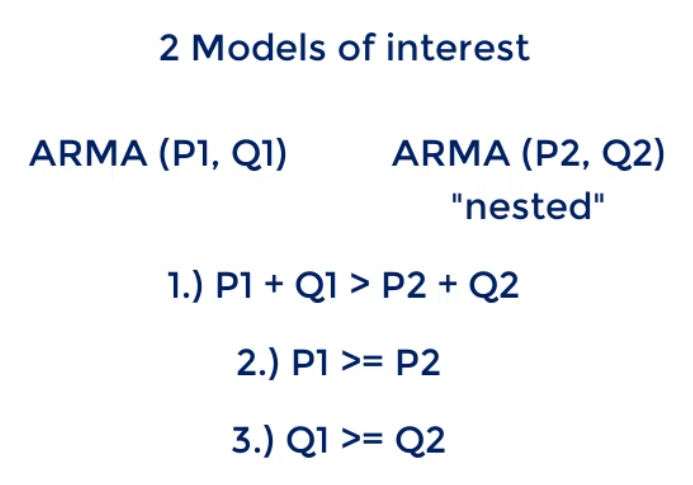

In [66]:
model_ret_ar_2_ma_2 = ARMA(df.returns[1:], order=(2,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
print(results_ret_ar_2_ma_2.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 2)   Log Likelihood               -7913.223
Method:                       css-mle   S.D. of innovations              1.170
Date:                Tue, 12 May 2020   AIC                          15838.446
Time:                        09:26:36   BIC                          15877.573
Sample:                    01-10-1994   HQIC                         15852.156
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.394      0.163      -0.008       0.045
ar.L1.returns     0.7820      0.238      3.284      0.001       0.315       1.249
ar.L2.returns    -0.1563      0.177     

In [67]:
model_ret_ar_2_ma_1 = ARMA(df.returns[1:], order=(2,1))
results_ret_ar_2_ma_1 = model_ret_ar_2_ma_1.fit()
print(results_ret_ar_2_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 1)   Log Likelihood               -7913.456
Method:                       css-mle   S.D. of innovations              1.171
Date:                Tue, 12 May 2020   AIC                          15836.913
Time:                        09:27:02   BIC                          15869.519
Sample:                    01-10-1994   HQIC                         15848.338
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.405      0.160      -0.007       0.045
ar.L1.returns     0.6541      0.093      7.068      0.000       0.473       0.835
ar.L2.returns    -0.0433      0.017     

In [68]:
model_ret_ar_1_ma_2 = ARMA(df.returns[1:], order=(1,2))
results_ret_ar_1_ma_2 = model_ret_ar_1_ma_2.fit()
print(results_ret_ar_1_ma_2.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 2)   Log Likelihood               -7913.670
Method:                       css-mle   S.D. of innovations              1.171
Date:                Tue, 12 May 2020   AIC                          15837.341
Time:                        09:27:31   BIC                          15869.947
Sample:                    01-10-1994   HQIC                         15848.766
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.410      0.158      -0.007       0.045
ar.L1.returns     0.6169      0.100      6.191      0.000       0.422       0.812
ma.L1.returns    -0.6471      0.100     

#### The chosen model is ARMA(3,2)
1. all significant coefficients
2. outpredicts all less-complex alternative

### Residuals for Returns

In [81]:
df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]

Text(0.5, 1.0, 'Residuals of Returns')

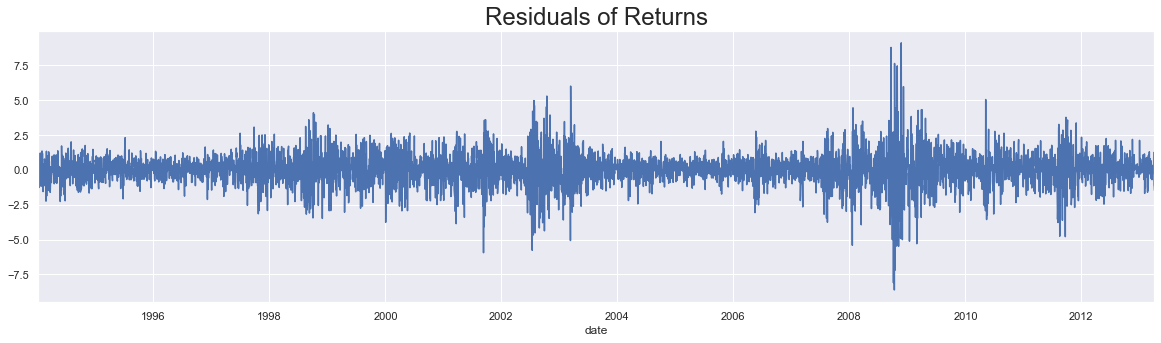

In [82]:
df.res_ret_ar_3_ma_2.plot(figsize= (20,5))
plt.title("Residuals of Returns", size=24)

It looks lise AR and MA residuals plots

This suggests that the volatility in returns might not be fully comprehendable if we use only ARMA models

Text(0.5, 1.0, 'ACF of Residuals for Returns')

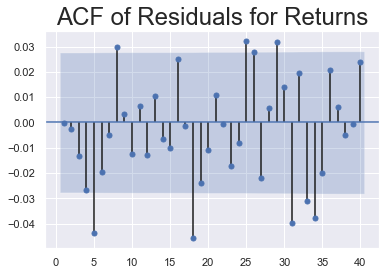

In [83]:
sgt.plot_acf(df.res_ret_ar_3_ma_2[2:],zero = False, lags = 40)
plt.title("ACF of Residuals for Returns", size = 24)

<b>Significant lags = dots outside the blue area</b>

We can see that the error at 5 lag is significant so we might want to check ARMA(5,5) +-

### Reevaluating Model Selection

In [84]:
model_ret_ar_5_ma_5 = ARMA(df.returns[1:], order=(5,5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
print(results_ret_ar_5_ma_5.summary()) 

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 5)   Log Likelihood               -7882.160
Method:                       css-mle   S.D. of innovations              1.163
Date:                Tue, 12 May 2020   AIC                          15788.321
Time:                        10:01:15   BIC                          15866.575
Sample:                    01-10-1994   HQIC                         15815.742
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.402      0.161      -0.008       0.045
ar.L1.returns    -0.0684      0.140     -0.490      0.624      -0.342       0.205
ar.L2.returns    -0.6722      0.146     

In [85]:
model_ret_ar_1_ma_5 = ARMA(df.returns[1:], order=(1,5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()
print(results_ret_ar_1_ma_5.summary()) 

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 5)   Log Likelihood               -7890.973
Method:                       css-mle   S.D. of innovations              1.165
Date:                Tue, 12 May 2020   AIC                          15797.947
Time:                        10:02:22   BIC                          15850.116
Sample:                    01-10-1994   HQIC                         15816.228
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.419      0.156      -0.007       0.045
ar.L1.returns     0.3285      0.152      2.159      0.031       0.030       0.627
ma.L1.returns    -0.3534      0.152     

In [86]:
model_ret_ar_5_ma_1 = ARMA(df.returns[1:], order=(5,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
print(results_ret_ar_5_ma_1.summary()) 

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 1)   Log Likelihood               -7889.311
Method:                       css-mle   S.D. of innovations              1.165
Date:                Tue, 12 May 2020   AIC                          15794.623
Time:                        10:02:41   BIC                          15846.792
Sample:                    01-10-1994   HQIC                         15812.903
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.407      0.159      -0.007       0.045
ar.L1.returns     0.3440      0.131      2.624      0.009       0.087       0.601
ar.L2.returns    -0.0458      0.015     

In [87]:
print(f'\n ARMA(1,5): \tLL = {results_ret_ar_1_ma_5.llf} \tAIC = {results_ret_ar_1_ma_5.aic}')
print(f'\n ARMA(5,1): \tLL = {results_ret_ar_5_ma_1.llf} \tAIC = {results_ret_ar_5_ma_1.aic}')


 ARMA(1,5): 	LL = -7890.9734602096205 	AIC = 15797.946920419241

 ARMA(5,1): 	LL = -7889.311282945861 	AIC = 15794.622565891723


#### ARMA(5,1) > ARMA(1,5)

In [89]:
print(f'\n ARMA(3,2): \tLL = {results_ret_ar_3_ma_2.llf} \tAIC = {results_ret_ar_3_ma_2.aic}')
print(f'\n ARMA(5,1): \tLL = {results_ret_ar_5_ma_1.llf} \tAIC = {results_ret_ar_5_ma_1.aic}')


 ARMA(3,2): 	LL = -7895.747458514716 	AIC = 15805.494917029431

 ARMA(5,1): 	LL = -7889.311282945861 	AIC = 15794.622565891723


#### ARMA(5,1) > ARMA(3,2)

#### In ARMA we cant now how many lags to take by ploting ACF and PACF so we have to plot ACF of Residuals

### Residuals for the New Model

In [93]:
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid

Text(0.5, 1.0, 'ACF of Residuals for Returns')

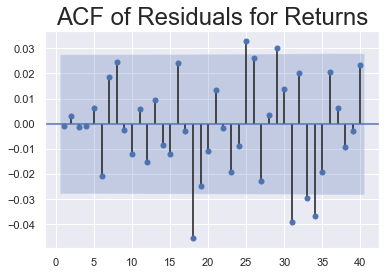

In [94]:
sgt.plot_acf(df.res_ret_ar_5_ma_1[2:],zero = False, lags = 40)
plt.title("ACF of Residuals for Returns", size = 24)

The 8th lag coefficient was significant for the residuals of ARMA(3,2)

### ARMA Models for Prices (non-stationary data)

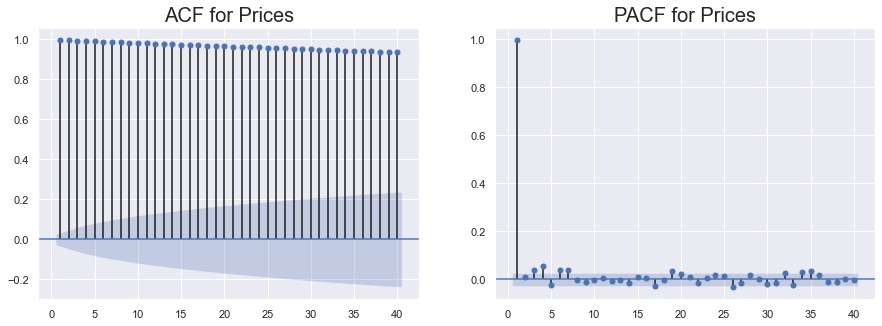

In [95]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

sm.graphics.tsa.plot_acf(df.market_value, lags = 40, zero = False, ax=ax[0])
ax[0].set_title("ACF for Prices",size=20)

sm.graphics.tsa.plot_pacf(df.market_value, lags = 40, zero = False, ax=ax[1])
ax[1].set_title("PACF for Prices",size=20)

plt.show()

In [96]:
model_ar_1_ma_1 = ARMA(df.market_value, order=(1,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
results_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 1)   Log Likelihood              -27621.787
Method:                       css-mle   S.D. of innovations             59.248
Date:                Tue, 12 May 2020   AIC                          55251.574
Time:                        10:15:19   BIC                          55277.659
Sample:                    01-07-1994   HQIC                         55260.714
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5076.1035    495.999     10.234      0.000    4103.963    6048.244
ar.L1.market_value     0.9985      0.001   1324.529      0.000       0.997       1.000
ma.L1.market_value    -0.0190      0.015     -1.274      0.203      -0.048       0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
MA.1           52.5201           +0.0000j           52.5201            0.0000
-----------------------------------------------------------------------------
"""

In [97]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid

Text(0.5, 1.0, 'ACF of Residuals for prices')

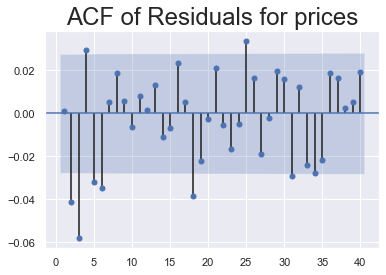

In [98]:
sgt.plot_acf(df.res_ar_1_ma_1,zero = False, lags = 40)
plt.title("ACF of Residuals for prices", size = 24)

In [102]:
model_ar_6_ma_6 = ARMA(df.market_value, order=(6,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit(start_ar_lags = 11)
results_ar_6_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 6)   Log Likelihood              -27587.932
Method:                       css-mle   S.D. of innovations             58.849
Date:                Tue, 12 May 2020   AIC                          55203.864
Time:                        10:18:27   BIC                          55295.164
Sample:                    01-07-1994   HQIC                         55235.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6493    568.207      8.957      0.000    3975.985    6203.314
ar.L1.market_value     1.9272      0.032     59.816      0.000       1.864       1.990
ar.L2.market_value    -1.7355      0.040    -43.291      0.000      -1.814      -1.657
ar.L3.market_value     1.2673      0.035     36.734      0.000       1.200       1.335
ar.L4.market_value    -0.2372      0.156     -1.516      0.129      -0.544       0.069
ar.L5.market_value    -0.4061      0.164     -2.482      0.013      -0.727      -0.085
ar.L6.market_value     0.1839      0.049      3.763      0.000       0.088       0.280
ma.L1.market_value    -0.9483      0.035    -26.993      0.000      -1.017      -0.879
ma.L2.market_value     0.7798      0.032     24.163      0.000       0.717       0.843
ma.L3.market_value    -0.5082      0.031    -16.302      0.000      -0.569      -0.447
ma.L4.market_value    -0.1561      0.157     -0.994      0.320      -0.464       0.152
ma.L5.market_value     0.0951      0.057      1.678      0.093      -0.016       0.206
ma.L6.market_value     0.0670      0.024      2.817      0.005       0.020       0.114
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0857           -1.0502j            1.0537           -0.2370
AR.2            0.0857           +1.0502j            1.0537            0.2370
AR.3           -2.0256           -0.0000j            2.0256           -0.5000
AR.4            1.0011           -0.0000j            1.0011           -0.0000
AR.5            1.5310           -0.2676j            1.5542           -0.0275
AR.6            1.5310           +0.2676j            1.5542            0.0275
MA.1            0.1028           -1.0612j            1.0662           -0.2346
MA.2            0.1028           +1.0612j            1.0662            0.2346
MA.3            1.3626           -0.2798j            1.3910           -0.0322
MA.4            1.3626           +0.2798j            1.3910            0.0322
MA.5           -2.1754           -1.4337j            2.6054           -0.4073
MA.6           -2.1754           +1.4337j            2.6054            0.4073
-----------------------------------------------------------------------------
"""

In [106]:
model_ar_5_ma_6 = ARMA(df.market_value, order=(5,6))
results_ar_5_ma_6 = model_ar_5_ma_6.fit(start_ar_lags = 7)
results_ar_5_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 6)   Log Likelihood              -27587.863
Method:                       css-mle   S.D. of innovations             58.849
Date:                Tue, 12 May 2020   AIC                          55201.726
Time:                        10:21:20   BIC                          55286.504
Sample:                    01-07-1994   HQIC                         55231.433
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6481    580.699      8.765      0.000    3951.500    6227.796
ar.L1.market_value     1.3584      0.178      7.640      0.000       1.010       1.707
ar.L2.market_value    -1.1289      0.238     -4.751      0.000      -1.595      -0.663
ar.L3.market_value     0.9147      0.229      3.992      0.000       0.466       1.364
ar.L4.market_value     0.0159      0.204      0.078      0.938      -0.384       0.416
ar.L5.market_value    -0.1613      0.119     -1.351      0.177      -0.395       0.073
ma.L1.market_value    -0.3795      0.178     -2.129      0.033      -0.729      -0.030
ma.L2.market_value     0.7294      0.125      5.824      0.000       0.484       0.975
ma.L3.market_value    -0.2197      0.153     -1.434      0.151      -0.520       0.080
ma.L4.market_value    -0.1387      0.114     -1.214      0.225      -0.363       0.085
ma.L5.market_value    -0.0879      0.017     -5.325      0.000      -0.120      -0.056
ma.L6.market_value     0.0265      0.024      1.128      0.259      -0.020       0.073
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0917           -1.0418j            1.0458           -0.2360
AR.2            0.0917           +1.0418j            1.0458            0.2360
AR.3            1.0010           -0.0000j            1.0010           -0.0000
AR.4            1.8981           -0.0000j            1.8981           -0.0000
AR.5           -2.9839           -0.0000j            2.9839           -0.5000
MA.1            0.1071           -1.0487j            1.0542           -0.2338
MA.2            0.1071           +1.0487j            1.0542            0.2338
MA.3           -1.5353           -1.5157j            2.1574           -0.3760
MA.4           -1.5353           +1.5157j            2.1574            0.3760
MA.5            1.5919           -0.0000j            1.5919           -0.0000
MA.6            4.5783           -0.0000j            4.5783           -0.0000
-----------------------------------------------------------------------------
"""

In [107]:
model_ar_6_ma_1 = ARMA(df.market_value, order=(6,1))
results_ar_6_ma_1 = model_ar_6_ma_1.fit(start_ar_lags = 7)
results_ar_6_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 1)   Log Likelihood              -27594.195
Method:                       css-mle   S.D. of innovations             58.923
Date:                Tue, 12 May 2020   AIC                          55206.389
Time:                        10:21:24   BIC                          55265.082
Sample:                    01-07-1994   HQIC                         55226.956
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6420    586.527      8.678      0.000    3940.069    6239.215
ar.L1.market_value     1.3921      0.058     23.931      0.000       1.278       1.506
ar.L2.market_value    -0.4369      0.059     -7.401      0.000      -0.553      -0.321
ar.L3.market_value    -0.0101      0.025     -0.409      0.683      -0.059       0.038
ar.L4.market_value     0.1126      0.025      4.527      0.000       0.064       0.161
ar.L5.market_value    -0.1158      0.025     -4.717      0.000      -0.164      -0.068
ar.L6.market_value     0.0573      0.014      4.067      0.000       0.030       0.085
ma.L1.market_value    -0.4127      0.060     -6.925      0.000      -0.529      -0.296
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2           -1.7608           -0.0000j            1.7608           -0.5000
AR.3           -0.0803           -1.8407j            1.8425           -0.2569
AR.4           -0.0803           +1.8407j            1.8425            0.2569
AR.5            1.4694           -0.8691j            1.7072           -0.0850
AR.6            1.4694           +0.8691j            1.7072            0.0850
MA.1            2.4234           +0.0000j            2.4234            0.0000
-----------------------------------------------------------------------------
"""

In [109]:
print(f'\n ARMA(5,6): \tLL = {results_ar_5_ma_6.llf} \tAIC = {results_ar_5_ma_6.aic}')
print(f'\n ARMA(6,1): \tLL = {results_ar_6_ma_1.llf} \tAIC = {results_ar_6_ma_1.aic}')


 ARMA(5,6): 	LL = -27587.862949267295 	AIC = 55201.72589853459

 ARMA(6,1): 	LL = -27594.19457098787 	AIC = 55206.38914197574


<b>ARMA(5,6) > ARMA(6,1)</b>

Text(0.5, 1.0, 'ACF of Residuals for prices')

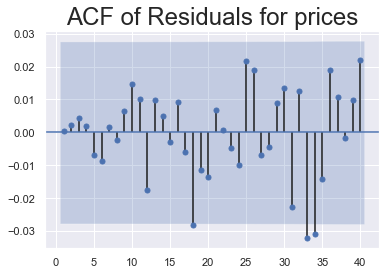

In [110]:
df['res_ar_5_ma_6'] = results_ar_5_ma_6.resid
sgt.plot_acf(df.res_ar_5_ma_6,zero = False, lags = 40)
plt.title("ACF of Residuals for prices", size = 24)

In [114]:
print(f'\nPrices => \tARMA(5,6): \tLL = {results_ar_5_ma_6.llf} \tAIC = {results_ar_5_ma_6.aic}')
print(f'\nReturns => \tARMA(5,1): \tLL = {results_ret_ar_5_ma_1.llf} \tAIC = {results_ret_ar_5_ma_1.aic}')


Prices => 	ARMA(5,6): 	LL = -27587.862949267295 	AIC = 55201.72589853459

Returns => 	ARMA(5,1): 	LL = -7889.311282945861 	AIC = 15794.622565891723


* #### ARMA is not good for non-stationary data